In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from linear_models import LinearRegression, PolynomialRegression, RidgeRegression, LogisticRegression

Linear Regression Example

Mean Squared Error: 0.7214982234014606


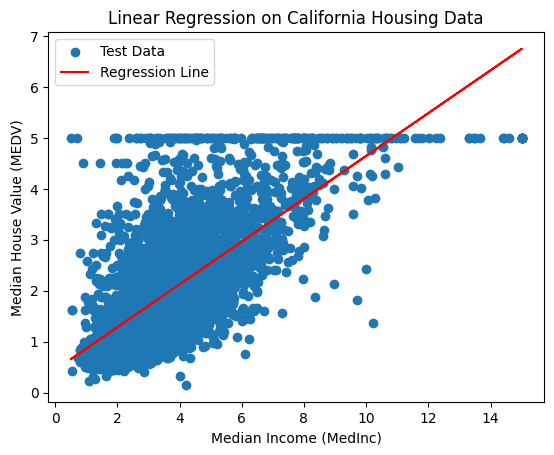

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error


california = fetch_california_housing()
data = pd.DataFrame(data=california.data, columns=california.feature_names)
target = pd.DataFrame(data=california.target, columns=['MEDV'])

#Using one feature
X = data[['MedInc']]  # Median income
y = target['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create LinearRegression instance
lr = LinearRegression()

# Fit the model without intercept
theta = lr.fit_intercept(X_train.values, y_train.values)

# Make predictions
y_pred = lr.predict(X_test.values)

# Calculate mean squared error
mse = lr.mean_squared_error(y_test.values, y_pred)
print("Mean Squared Error:", mse)

# Plot the data and regression line
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MEDV)")
plt.title("Linear Regression on California Housing Data")
plt.legend()
plt.show()

In [3]:
california = fetch_california_housing()
data = pd.DataFrame(data=california.data, columns=california.feature_names)
target = pd.DataFrame(data=california.target, columns=['MEDV'])

# Use all features
X = data
y = target['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create LinearRegression instance
lr = LinearRegression()
ridge = RidgeRegression(alpha=0.0000000001) #Change value of alpha to observe small difference for this example

# Fit the model
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_MEDV'])
ridge_pred_df = pd.DataFrame(y_pred, columns=['Predicted_MEDV ridge'])
comparison_df = pd.concat([y_test.reset_index(drop=True), y_pred_df, ridge_pred_df], axis=1)
print(comparison_df)
# Calculate mean squared error
lr_mse, ridge_mse = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, ridge_pred)
print("Mean Squared Error:", lr_mse, ridge_mse)


       MEDV  Predicted_MEDV  Predicted_MEDV ridge
0     1.369        2.281107              2.281107
1     2.413        2.790091              2.790091
2     2.007        1.903328              1.903328
3     0.725        1.017603              1.017603
4     4.600        2.948524              2.948524
...     ...             ...                   ...
4123  1.695        1.616753              1.616753
4124  2.046        2.409188              2.409188
4125  1.286        0.841870              0.841870
4126  2.595        2.798495              2.798495
4127  1.676        2.217793              2.217793

[4128 rows x 3 columns]
Mean Squared Error: 0.5289841670368681 0.5289841670366758


Simple Example for polynomial Regression


Coefficients: [[-3.66288352e-02]
 [ 9.32857959e-01]
 [ 7.21785696e-03]
 [-1.35076375e-01]
 [ 6.26231791e-05]
 [ 4.07404267e-03]]


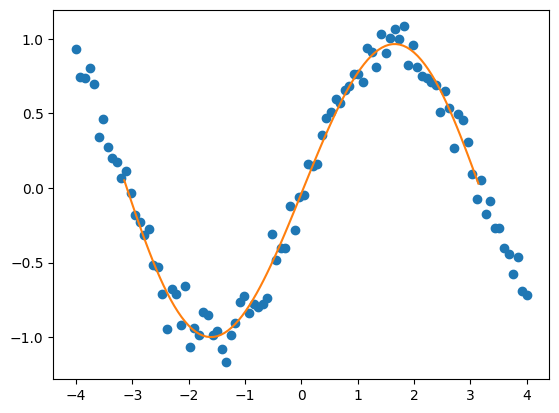

In [4]:
#The act that we take sin as example is the fact that we express it in a Taylor Form
np.random.seed(0)
X = np.linspace(-4, 4, 100).reshape(100, 1)
y = np.sin(X) + np.random.randn(100, 1)/10
poly_regression = PolynomialRegression(degree=5)
poly_regression.fit(X, y)
new_X = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
predicted_y = poly_regression.predict(new_X)     
print("Coefficients:", poly_regression.coef)
plt.plot(X, y, 'o', label='Test Data')
plt.plot(new_X, predicted_y, label='Polynimial Prediction')

Using Logistic Class

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist["data"], mnist["target"]

/home/casteck/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


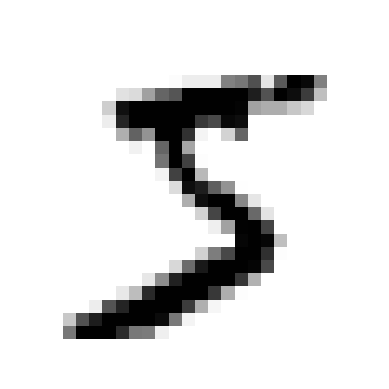

In [6]:
def plot_digit(image):
    image = image.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_digit(X[0])

In [8]:
#Training a binary classifier
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_reg = LogisticRegression()
sgd_reg.fit(X_train, y_train_5)


Training: 100%|██████████| 1000/1000 [10:56<00:00,  1.52iteration/s, Loss=0.794]


In [10]:
from sklearn.metrics import accuracy_score
y_pred_5 = sgd_reg.predict(X_train)

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion_matrix(y_train_5, y_pred_5)

array([[54015,   564],
       [  895,  4526]])

In [12]:
precision = precision_score(y_train_5, y_pred_5)
recall    = recall_score(y_train_5, y_pred_5)
print(precision, recall) #About 89% of precision

0.8891944990176818 0.8349013097214536


In [8]:
#Another Test using iris Datasets
from sklearn.datasets import load_iris
from linear_models import LogisticRegression
import numpy as np
iris = load_iris()

In [17]:
X = iris.data[:, 2:4] #petal length and petal width
y = (iris.target == 0).astype(np.int8) #iris setosa ?

In [39]:
log_clf = LogisticRegression(num_iterations=10000)
log_clf.fit(X, y)

Training: 100%|██████████| 10000/10000 [00:21<00:00, 467.67iteration/s, Loss=0.0494]


In [40]:
y_pred = log_clf.predict(X)

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[100   0]
 [  0  50]]
